# Flood Insurance Claims in New York City

Exploratory Data Analysis (EDA) of the National Flood Insurance Program (NFIP) claims in New York City since 1968. 

*Mark Bauer*


# Table of Contents

Fill in here

## 1 Executive Summary

Add text here.

# 2 Introduction

Add text here.

# 3 Loading and Exploring Data

## 3.1 Loading libraries and reading the data into a pandas dataframe in Python.

In [2]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import geopandas as gpd
from geopandas.tools import overlay
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pylab as pl 
import shapely
from fiona.crs import from_epsg
import urllib
from matplotlib.ticker import FuncFormatter



# to Plot matplotlib figures inline on the notebook
%matplotlib inline

Since the data file is quite large, we want to download it in our Downloads folder. We use the cd command to change directories into our destination folder.

In [2]:
# changing directories to Downloads folder
%cd ~/Downloads/

/Users/geribauer/Downloads


# Reading in FEMA's NFIP Redacted Claims Data

In [13]:
# dowloading the data with urllib.request.urlretrieve()
url = 'https://www.fema.gov/media-library-data/1573579826597-4bb5bb11ca85d56f98b950c9da6318f5/FIMA_NFIP_Redacted_Claims_Data_Set.zip'

# retrieving the file and naming it as 'nfip_claims.gz'
urllib.request.urlretrieve(url, "nfip_claims.gz")

('nfip_claims.gz', <http.client.HTTPMessage at 0x1a1ab83ef0>)

In [14]:
# unzipping the file
!unzip -d ~/Downloads/ nfip_claims.gz 

Archive:  nfip_claims.gz
  inflating: /Users/geribauer/Downloads/NFIP Claims Instructions and Metadata.xlsx  
  inflating: /Users/geribauer/Downloads/openFEMA_claims20190731.csv  


In [3]:
# read our data into a DataFrame
nfip_claims = pd.read_csv('openFEMA_claims20190731.csv')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,11,15,22,23,31,32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 3.2 Data Size and Structure 

Add text here.

In [4]:
# previewing the data 
nfip_claims.head()

,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence
0,NaN,2019-07-31,NaN,0.0,OCEANSIDE,N,1.0,6073.0,0.00,1998-02-07,...,NaN,N,7,NaN,CA,200000.0,50000.0,1998,92056,NaN
1,NaN,2019-07-31,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,0.00,2005-08-29,...,NaN,N,7,NaN,LA,100000.0,40000.0,2005,70131,Y
2,NaN,2019-07-31,NaN,0.0,NAVARRE,N,1.0,12113.0,0.05,1998-09-28,...,0.0,N,1,NaN,FL,100000.0,50000.0,1998,32566,NaN
3,NaN,2019-07-31,NaN,1.0,BEAUFORT,N,1.0,45013.0,0.00,1994-10-07,...,NaN,N,7,NaN,SC,100000.0,25000.0,1994,29902,NaN
4,NaN,2019-07-31,NaN,0.0,MELBOURNE,N,1.0,12009.0,0.00,1996-03-11,...,NaN,Y,7,NaN,FL,100000.0,25000.0,1996,32940,NaN


## 3.3 Creating Directories To Store Our Data 

In [5]:
# identifying our current working directory
%pwd

'/Users/geribauer/Downloads'

In [6]:
# changing directories into the target folder
cd ~/'fema-nfip-claims'

/Users/geribauer/fema-nfip-claims


In [28]:
# making directory to store our nyc project
!mkdir ~/'fema-nfip-claims'/'nfip-claims-nyc'

In [29]:
# making directory to store our national project
!mkdir ~/'fema-nfip-claims'/'nfip-claims-national'

In [7]:
# changing directories into our nyc project folder
cd ~/'fema-nfip-claims'/'nfip-claims-nyc'

/Users/geribauer/fema-nfip-claims/nfip-claims-nyc


In [31]:
# making directory to store our nyc project data 
!mkdir ~/'fema-nfip-claims'/'nfip-claims-nyc'/'DATA' 

In [32]:
# making directory to store our nyc project output files
!mkdir ~/'fema-nfip-claims'/'nfip-claims-nyc'/'OutputFiles'

In [33]:
# making directory to store our nyc project shapefiles
!mkdir ~/'fema-nfip-claims'/'nfip-claims-nyc'/'Shapefiles'

In [34]:
# making directory to store our nyc project figures/plots
!mkdir ~/'fema-nfip-claims'/'nfip-claims-nyc'/'Figures'

In [35]:
# changing directories back into our downoalds folder
cd ~/'Downloads'

/Users/geribauer/Downloads


In [36]:
# moving the metadata into our nyc project data folder
%mv 'NFIP Claims Instructions and Metadata.xlsx' ~/'fema-nfip-claims'/'nfip-claims-nyc'/'DATA'

In [8]:
# changing directories into our nyc project folder
%cd ~/'fema-nfip-claims'/'nfip-claims-nyc'

/Users/geribauer/fema-nfip-claims/nfip-claims-nyc


In [9]:
# listing files in our directory
%ls

DATA/                  NYC NFIP Claims.ipynb  Shapefiles/
Figures/               OutputFiles/


# 4 Selecting only NFIP claims in New York City

In [10]:
# previewing our data
nfip_claims.head()

,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence
0,NaN,2019-07-31,NaN,0.0,OCEANSIDE,N,1.0,6073.0,0.00,1998-02-07,...,NaN,N,7,NaN,CA,200000.0,50000.0,1998,92056,NaN
1,NaN,2019-07-31,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,0.00,2005-08-29,...,NaN,N,7,NaN,LA,100000.0,40000.0,2005,70131,Y
2,NaN,2019-07-31,NaN,0.0,NAVARRE,N,1.0,12113.0,0.05,1998-09-28,...,0.0,N,1,NaN,FL,100000.0,50000.0,1998,32566,NaN
3,NaN,2019-07-31,NaN,1.0,BEAUFORT,N,1.0,45013.0,0.00,1994-10-07,...,NaN,N,7,NaN,SC,100000.0,25000.0,1994,29902,NaN
4,NaN,2019-07-31,NaN,0.0,MELBOURNE,N,1.0,12009.0,0.00,1996-03-11,...,NaN,Y,7,NaN,FL,100000.0,25000.0,1996,32940,NaN


In [11]:
# dimensionality (rows, columns) of the DataFrame
nfip_claims.shape

(2431532, 39)

In [12]:
# viewing the columns and datatypes in dataframe
nfip_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431532 entries, 0 to 2431531
Data columns (total 39 columns):
agriculturestructureindicator                 object
asofdate                                      object
basefloodelevation                            float64
basementenclosurecrawlspacetype               float64
reportedcity                                  object
condominiumindicator                          object
policycount                                   float64
countycode                                    float64
crsdiscount                                   float64
dateofloss                                    object
elevatedbuildingindicator                     object
elevationcertificateindicator                 object
elevationdifference                           float64
censustract                                   float64
floodzone                                     object
houseworship                                  object
latitude                        

In [13]:
# viewing descriptive statistics of dataframe
nfip_claims.describe()

,basefloodelevation,basementenclosurecrawlspacetype,policycount,countycode,crsdiscount,elevationdifference,censustract,latitude,longitude,lowestadjacentgrade,lowestfloorelevation,numberoffloorsintheinsuredbuilding,occupancytype,amountpaidonbuildingclaim,amountpaidoncontentsclaim,amountpaidonincreasedcostofcomplianceclaim,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss
count,483254.000000,2.431487e+06,2.431524e+06,2.424799e+06,2.431524e+06,2.431524e+06,2.372644e+06,2.378397e+06,2.378397e+06,350393.000000,474730.000000,2.414902e+06,2.430812e+06,2.358184e+06,1.712028e+06,1.157869e+06,2.431524e+06,2.431524e+06,2.431532e+06
mean,71.220959,4.670298e-01,1.247354e+00,3.021615e+04,3.494738e-02,7.505246e+02,3.004590e+10,3.404361e+01,-8.614262e+01,75.271269,148.120405,1.722710e+00,1.403904e+00,2.364174e+04,7.722133e+03,7.591361e+02,1.511973e+05,2.817844e+04,2.000623e+03
std,300.039973,9.310357e-01,6.236459e+00,1.458167e+04,6.239090e-02,4.321260e+02,1.445390e+10,5.800821e+00,1.110676e+01,546.410337,979.912128,8.858041e-01,9.668458e-01,5.275545e+04,2.279401e+04,4.438189e+03,2.777439e+06,4.807586e+04,1.179248e+01
min,-6002.000000,0.000000e+00,1.000000e+00,1.001000e+03,0.000000e+00,-1.987000e+03,1.003000e+03,-1.428000e+01,-1.707000e+02,-3411.000000,-6002.000000,1.000000e+00,1.000000e+00,-2.920705e+04,-8.484000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.970000e+03
25%,7.000000,0.000000e+00,1.000000e+00,2.201900e+04,0.000000e+00,9.990000e+02,2.201900e+10,2.989000e+01,-9.139000e+01,3.200000,6.500000,1.000000e+00,1.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,3.500000e+04,0.000000e+00,1.992000e+03
50%,9.000000,0.000000e+00,1.000000e+00,2.916300e+04,0.000000e+00,9.990000e+02,2.912796e+10,3.191000e+01,-8.747000e+01,6.700000,10.300000,1.000000e+00,1.000000e+00,4.800000e+03,2.253500e+02,0.000000e+00,9.080000e+04,1.050000e+04,2.004000e+03
75%,14.000000,0.000000e+00,1.000000e+00,4.207700e+04,5.000000e-02,9.990000e+02,4.206195e+10,3.993000e+01,-7.689000e+01,12.900000,17.800000,2.000000e+00,1.000000e+00,2.397100e+04,5.812865e+03,0.000000e+00,1.948000e+05,4.000000e+04,2.011000e+03
max,9998.000000,4.000000e+00,1.090000e+03,7.803000e+04,4.000000e-01,9.998000e+03,7.803096e+10,6.987000e+01,1.449200e+02,99999.100000,99999.900000,6.000000e+00,6.000000e+00,1.000000e+07,7.500000e+05,6.000000e+04,4.000000e+09,6.000000e+06,2.019000e+03


## 4.1 Filter the NFIP claims in the state of New York


In [14]:
# selecting only NFIP claims with 'state' as 'NY.'
nfip_claims_ny = nfip_claims.loc[nfip_claims['state'] == 'NY']

In [15]:
# viewing rows and columns of dataframe
nfip_claims_ny.shape

(169442, 39)

In [16]:
# printing number of claims (rows) in NY in dataframe
print('There have been', format(nfip_claims_ny.shape[0], ','), 'NFIP claims in the state of New York since 1968.')

There have been 169,442 NFIP claims in the state of New York since 1968.


In [17]:
# viewing first five rows of dataframe
nfip_claims_ny.head()

,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence
340,NaN,2019-07-31,NaN,1.0,MOUNT KISCO,N,1.0,36119.0,0.0,2001-06-16,...,NaN,N,7,NaN,NY,20000.0,5000.0,2001,10549,Y
507,NaN,2019-07-31,NaN,0.0,ROCKY POINT,N,1.0,36103.0,0.0,2013-06-07,...,NaN,N,7,NaN,NY,250000.0,100000.0,2013,11778,Y
533,NaN,2019-07-31,7.0,0.0,"DAVIS PARK, FI",N,1.0,36103.0,0.0,2012-10-29,...,0.0,N,1,NaN,NY,250000.0,34300.0,2012,11772,N
534,NaN,2019-07-31,12.0,0.0,"DAVIS PARK, FI",N,1.0,36103.0,0.0,2012-10-29,...,0.0,N,A,NaN,NY,250000.0,31100.0,2012,11772,N
562,NaN,2019-07-31,12.0,0.0,POINT O WOODS,N,1.0,36103.0,0.0,2011-08-28,...,0.0,Y,A,NaN,NY,250000.0,100000.0,2011,11706,N


In [18]:
# resetting and droping index
nfip_claims_ny.reset_index(drop=True).head()

,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence
0,NaN,2019-07-31,NaN,1.0,MOUNT KISCO,N,1.0,36119.0,0.0,2001-06-16,...,NaN,N,7,NaN,NY,20000.0,5000.0,2001,10549,Y
1,NaN,2019-07-31,NaN,0.0,ROCKY POINT,N,1.0,36103.0,0.0,2013-06-07,...,NaN,N,7,NaN,NY,250000.0,100000.0,2013,11778,Y
2,NaN,2019-07-31,7.0,0.0,"DAVIS PARK, FI",N,1.0,36103.0,0.0,2012-10-29,...,0.0,N,1,NaN,NY,250000.0,34300.0,2012,11772,N
3,NaN,2019-07-31,12.0,0.0,"DAVIS PARK, FI",N,1.0,36103.0,0.0,2012-10-29,...,0.0,N,A,NaN,NY,250000.0,31100.0,2012,11772,N
4,NaN,2019-07-31,12.0,0.0,POINT O WOODS,N,1.0,36103.0,0.0,2011-08-28,...,0.0,Y,A,NaN,NY,250000.0,100000.0,2011,11706,N


In [19]:
# making sure there are only claims as NY in dataframe
nfip_claims_ny.state.unique()

array(['NY'], dtype=object)

## 4.2 Filtering NFIP claims for New York City

The counties New York City are:

* 005 - Bronx.
* 047 - Kings (Brooklyn)
* 061 - New York (Manhattan)
* 081 - Queens.
* 085 - Richmond (Staten Island)

The state code of 36.

Source: https://en.m.wikipedia.org/wiki/List_of_counties_in_New_York

In [20]:
# passing the state and county codes of NYC into a list
nyc_countycodes = [36005, 36047, 36061, 36081, 36085]

In [21]:
# selecting only NFIP claims with a NYC county code
nfip_claims_nyc = nfip_claims_ny.loc[nfip_claims_ny['countycode'].isin(nyc_countycodes)]
nfip_claims_nyc.head()

,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence
676,NaN,2019-07-31,NaN,1.0,BRONX,N,1.0,36005.0,0.0,2011-08-27,...,NaN,N,7,NaN,NY,250000.0,100000.0,2011,10471,Y
677,NaN,2019-07-31,NaN,1.0,BRONX,N,1.0,36005.0,0.0,2012-05-24,...,NaN,N,7,NaN,NY,250000.0,100000.0,2012,10471,Y
964,NaN,2019-07-31,NaN,0.0,BROOKLYN,N,1.0,36047.0,0.0,2012-10-29,...,0.0,N,7,NaN,NY,250000.0,100000.0,2012,11234,Y
1748,NaN,2019-07-31,NaN,2.0,STATEN ISLAND,N,1.0,36085.0,0.0,2011-10-29,...,0.0,N,7,NaN,NY,250000.0,100000.0,2011,10314,Y
2174,NaN,2019-07-31,NaN,1.0,BROOKLYN,N,1.0,36047.0,0.0,2012-10-29,...,0.0,N,7,NaN,NY,250000.0,100000.0,2012,11235,Y


In [22]:
# resetting index
nfip_claims_nyc.reset_index(drop=True, inplace=True)

In [23]:
# viewing first five rows of dataframe
nfip_claims_nyc.head()

,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence
0,NaN,2019-07-31,NaN,1.0,BRONX,N,1.0,36005.0,0.0,2011-08-27,...,NaN,N,7,NaN,NY,250000.0,100000.0,2011,10471,Y
1,NaN,2019-07-31,NaN,1.0,BRONX,N,1.0,36005.0,0.0,2012-05-24,...,NaN,N,7,NaN,NY,250000.0,100000.0,2012,10471,Y
2,NaN,2019-07-31,NaN,0.0,BROOKLYN,N,1.0,36047.0,0.0,2012-10-29,...,0.0,N,7,NaN,NY,250000.0,100000.0,2012,11234,Y
3,NaN,2019-07-31,NaN,2.0,STATEN ISLAND,N,1.0,36085.0,0.0,2011-10-29,...,0.0,N,7,NaN,NY,250000.0,100000.0,2011,10314,Y
4,NaN,2019-07-31,NaN,1.0,BROOKLYN,N,1.0,36047.0,0.0,2012-10-29,...,0.0,N,7,NaN,NY,250000.0,100000.0,2012,11235,Y


In [24]:
# viewing rows and columns of dataframe
nfip_claims_nyc.shape

(43280, 39)

In [25]:
# printing number of claims (i.e. rows) in NYC
print('There have been', format(nfip_claims_nyc.shape[0], ','), 'NFIP claims in New York City since 1968.')

There have been 43,280 NFIP claims in New York City since 1968.


In [26]:
# viewing the 'county codes' in our dataframe
nfip_claims_nyc.countycode.unique()

array([36005., 36047., 36085., 36081., 36061.])

## 4.3 Exporting New York City claims as a csv file

In [31]:
# identifying our current project directory
%pwd

'/Users/geribauer/fema-nfip-claims/nfip-claims-nyc'

In [32]:
# write (saving) a new dataframe called'nfip_claims_nyc20190731.csv' to a csv file
nfip_claims_nyc.to_csv('OutputFiles/nfip_claims_nyc20190731.csv')

In [33]:
# making sure our new csv is in our OutputFiles folder
%cd OutputFiles/
%ls

/Users/geribauer/fema-nfip-claims/nfip-claims-nyc/OutputFiles
nfip_claims_nyc.csv          nyc_claims_byborough.csv
nfip_claims_nyc20190731.csv


## 4.4 Reading in our New York City claims data

In [34]:
# changing directories into our OutputFiles folder to retreive our data
%cd ~/fema-nfip-claims/nfip-claims-nyc/OutputFiles

/Users/geribauer/fema-nfip-claims/nfip-claims-nyc/OutputFiles


In [35]:
# reading our data into a dataframe
nfip_claims_nyc = pd.read_csv('nfip_claims_nyc20190731.csv')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
# changind directories back to our project folder
%cd ~/fema-nfip-claims/nfip-claims-nyc/

/Users/geribauer/fema-nfip-claims/nfip-claims-nyc


In [37]:
# viewing first five rows of dataframe
nfip_claims_nyc.head()

,Unnamed: 0,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,...,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence
0,0,NaN,2019-07-31,NaN,1.0,BRONX,N,1.0,36005.0,0.0,...,NaN,N,7,NaN,NY,250000.0,100000.0,2011,10471,Y
1,1,NaN,2019-07-31,NaN,1.0,BRONX,N,1.0,36005.0,0.0,...,NaN,N,7,NaN,NY,250000.0,100000.0,2012,10471,Y
2,2,NaN,2019-07-31,NaN,0.0,BROOKLYN,N,1.0,36047.0,0.0,...,0.0,N,7,NaN,NY,250000.0,100000.0,2012,11234,Y
3,3,NaN,2019-07-31,NaN,2.0,STATEN ISLAND,N,1.0,36085.0,0.0,...,0.0,N,7,NaN,NY,250000.0,100000.0,2011,10314,Y
4,4,NaN,2019-07-31,NaN,1.0,BROOKLYN,N,1.0,36047.0,0.0,...,0.0,N,7,NaN,NY,250000.0,100000.0,2012,11235,Y


In [38]:
# dropping column 'Unnamed:0' from dataframe
nfip_claims_nyc.drop(columns=['Unnamed: 0'], inplace=True)

In [39]:
# viewing first five rows of dataframe
nfip_claims_nyc.head()

,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence
0,NaN,2019-07-31,NaN,1.0,BRONX,N,1.0,36005.0,0.0,2011-08-27,...,NaN,N,7,NaN,NY,250000.0,100000.0,2011,10471,Y
1,NaN,2019-07-31,NaN,1.0,BRONX,N,1.0,36005.0,0.0,2012-05-24,...,NaN,N,7,NaN,NY,250000.0,100000.0,2012,10471,Y
2,NaN,2019-07-31,NaN,0.0,BROOKLYN,N,1.0,36047.0,0.0,2012-10-29,...,0.0,N,7,NaN,NY,250000.0,100000.0,2012,11234,Y
3,NaN,2019-07-31,NaN,2.0,STATEN ISLAND,N,1.0,36085.0,0.0,2011-10-29,...,0.0,N,7,NaN,NY,250000.0,100000.0,2011,10314,Y
4,NaN,2019-07-31,NaN,1.0,BROOKLYN,N,1.0,36047.0,0.0,2012-10-29,...,0.0,N,7,NaN,NY,250000.0,100000.0,2012,11235,Y


In [40]:
# viewing last five rows of dataframe
nfip_claims_nyc.tail()

,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence
43275,NaN,2019-07-31,NaN,2.0,ARVERNE,N,1.0,36081.0,0.0,2012-10-29,...,0.0,N,1,NaN,NY,250000.0,0.0,2012,11692,Y
43276,NaN,2019-07-31,NaN,2.0,ARVERNE,N,1.0,36081.0,0.0,2014-01-08,...,NaN,N,1,NaN,NY,220000.0,0.0,2014,11692,Y
43277,NaN,2019-07-31,NaN,0.0,BRONX,U,1.0,36005.0,0.0,2012-10-30,...,NaN,N,1,NaN,NY,150000.0,43500.0,2012,10464,N
43278,NaN,2019-07-31,NaN,1.0,BROOKLYN,N,1.0,36047.0,0.0,2013-03-24,...,0.0,N,7,NaN,NY,250000.0,100000.0,2013,11204,N
43279,NaN,2019-07-31,10.0,2.0,STATEN ISLAND,N,1.0,36085.0,0.0,2012-10-29,...,0.0,Y,2,NaN,NY,250000.0,100000.0,2012,10306,Y


In [41]:
# making sure there are only NY claims in our dataframe 
nfip_claims_nyc.state.unique()

array(['NY'], dtype=object)

In [42]:
# making sure there are only claims in NYC county in our dataframe 
nfip_claims_nyc.countycode.unique()

array([36005., 36047., 36085., 36081., 36061.])

In [43]:
# viewing rows and columns of dataframe
nfip_claims_nyc.shape

(43280, 39)

# 5 Identifying any missing data 

## 5.1 Identify columns containing missing values.

In [45]:
# checking if there are any null values in dataframe
nfip_claims_nyc.isnull().values.any()

True

In [29]:
# summing the number of null values in dataframe
nfip_claims_nyc.isnull().sum().sum()

475244

In [46]:
# viewing descriptive statistics of dataframe
nfip_claims_nyc.describe()

,basefloodelevation,basementenclosurecrawlspacetype,policycount,countycode,crsdiscount,elevationdifference,censustract,latitude,longitude,lowestadjacentgrade,lowestfloorelevation,numberoffloorsintheinsuredbuilding,obstructiontype,occupancytype,amountpaidonbuildingclaim,amountpaidoncontentsclaim,amountpaidonincreasedcostofcomplianceclaim,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss
count,4226.000000,43280.000000,43280.000000,43280.000000,43280.000000,43280.000000,4.326500e+04,43280.000000,43280.000000,3865.000000,4229.000000,43200.000000,19453.000000,43248.000000,4.152400e+04,28802.000000,19155.000000,4.328000e+04,43280.000000,43280.000000
mean,14.461335,1.481955,1.264672,36074.495564,0.000152,896.544709,3.607371e+10,40.611645,-73.989269,8.534774,69.769496,2.398472,14.088418,1.473849,3.000766e+04,5329.818577,252.906539,1.622016e+05,21513.248614,1997.168854
std,73.055895,1.266677,7.099920,18.895559,0.004633,303.109564,1.744590e+08,0.070522,0.139710,36.876979,765.924637,0.733574,13.251304,0.821425,9.124808e+04,25056.578952,2660.522937,1.228559e+06,48535.728836,15.104257
min,-7.000000,0.000000,1.000000,36005.000000,0.000000,-17.000000,3.605900e+04,40.500000,-74.260000,-8.000000,-9.800000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1976.000000
25%,9.000000,0.000000,1.000000,36081.000000,0.000000,999.000000,3.608107e+10,40.570000,-74.110000,5.400000,6.800000,2.000000,10.000000,1.000000,3.215800e+02,0.000000,0.000000,7.300000e+03,0.000000,1980.000000
50%,10.000000,1.000000,1.000000,36081.000000,0.000000,999.000000,3.608111e+10,40.590000,-74.000000,7.500000,10.000000,3.000000,10.000000,1.000000,3.118235e+03,745.000000,0.000000,8.830000e+04,4200.000000,2004.000000
75%,10.000000,3.000000,1.000000,36085.000000,0.000000,999.000000,3.608501e+10,40.620000,-73.850000,9.400000,11.400000,3.000000,10.000000,2.000000,3.630707e+04,2650.727500,0.000000,2.500000e+05,10600.000000,2012.000000
max,2000.000000,4.000000,452.000000,36085.000000,0.250000,999.000000,3.611901e+10,40.910000,-73.710000,1428.000000,9994.000000,6.000000,92.000000,6.000000,7.447962e+06,500000.000000,30000.000000,1.095000e+08,1000000.000000,2019.000000


In [27]:
# viewing the number of non-null values and the datatype of each column in dataframe
nfip_claims_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43280 entries, 0 to 43279
Data columns (total 39 columns):
agriculturestructureindicator                 141 non-null object
asofdate                                      43280 non-null object
basefloodelevation                            4226 non-null float64
basementenclosurecrawlspacetype               43280 non-null float64
reportedcity                                  43257 non-null object
condominiumindicator                          38537 non-null object
policycount                                   43280 non-null float64
countycode                                    43280 non-null float64
crsdiscount                                   43280 non-null float64
dateofloss                                    43280 non-null object
elevatedbuildingindicator                     38553 non-null object
elevationcertificateindicator                 14541 non-null object
elevationdifference                           43280 non-null float64
cens

In [30]:
# printing number of null values in dataframe
print('There are', format(nfip_claims_nyc.isnull().sum().sum(), ','), 
      'null values in this dataset.')

There are 475,244 null values in this dataset.


# 6 Identifyin NFIP claims by borough

## 6.1 Creating the Borough Name from our State and County Codes

The counties New York City are:
* 005 - Bronx.
* 047 - Kings (Brooklyn)
* 061 - New York (Manhattan)
* 081 - Queens.
* 085 - Richmond (Staten Island)

In [49]:
# adding a new column called 'Borough' that is a mirror of the 'countycode' column
nfip_claims_nyc['Borough'] = nfip_claims_nyc['countycode']

In [50]:
# viewing unique values in our Borough column
nfip_claims_nyc.Borough.unique()

array([36005., 36047., 36085., 36081., 36061.])

In [51]:
# replacing the county codes with the borough name 
nfip_claims_nyc.replace({'Borough': {36005: 'Bronx', 36047: 'Brooklyn', 36061: 'Manhattan', 36081:'Queens', 36085: 'Staten Island'}}, inplace=True)

In [52]:
# viewing first five rows in our Borough column
nfip_claims_nyc.Borough.head()

0            Bronx
1            Bronx
2         Brooklyn
3    Staten Island
4         Brooklyn
Name: Borough, dtype: object

In [53]:
# viewing the unique values in our Borough column
nfip_claims_nyc.Borough.unique()

array(['Bronx', 'Brooklyn', 'Staten Island', 'Queens', 'Manhattan'],
      dtype=object)

In [54]:
# viewing the number of claims in each borough
nfip_claims_nyc.Borough.value_counts()

Staten Island    20006
Queens           13796
Brooklyn          5676
Manhattan         2150
Bronx             1652
Name: Borough, dtype: int64

## 6.2 Previewing all columns in our dataframe. 

In [55]:
# previewing first 15 columns in dataframe
nfip_claims_nyc.iloc[:,:15].head()

,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,elevatedbuildingindicator,elevationcertificateindicator,elevationdifference,censustract,floodzone
0,NaN,2019-07-31,nan,1.00,BRONX,N,1.00,36005.00,0.00,2011-08-27,N,NaN,999.00,36005033500.00,X
1,NaN,2019-07-31,nan,1.00,BRONX,N,1.00,36005.00,0.00,2012-05-24,N,NaN,999.00,36005033500.00,X
2,NaN,2019-07-31,nan,0.00,BROOKLYN,N,1.00,36047.00,0.00,2012-10-29,N,NaN,999.00,36047070201.00,X
3,NaN,2019-07-31,nan,2.00,STATEN ISLAND,N,1.00,36085.00,0.00,2011-10-29,N,NaN,999.00,36085029103.00,X
4,NaN,2019-07-31,nan,1.00,BROOKLYN,N,1.00,36047.00,0.00,2012-10-29,N,NaN,999.00,36047062000.00,X


In [56]:
# previewing columns 16 to 30 in dataframe
nfip_claims_nyc.iloc[:,15:30].head()

,houseworship,latitude,locationofcontents,longitude,lowestadjacentgrade,lowestfloorelevation,numberoffloorsintheinsuredbuilding,nonprofitindicator,obstructiontype,occupancytype,originalconstructiondate,originalnbdate,amountpaidonbuildingclaim,amountpaidoncontentsclaim,amountpaidonincreasedcostofcomplianceclaim
0,NaN,40.89,NaN,-73.91,nan,nan,3.00,NaN,nan,1.00,1929-01-01,2011-07-02,0.00,0.00,nan
1,NaN,40.89,NaN,-73.91,nan,nan,3.00,NaN,nan,1.00,1929-01-01,2011-07-02,0.00,0.00,nan
2,NaN,40.61,NaN,-73.90,nan,nan,3.00,NaN,nan,1.00,1959-01-01,1989-10-24,56524.12,4305.60,0.00
3,NaN,40.60,NaN,-74.17,nan,nan,3.00,NaN,nan,1.00,1983-01-01,1993-11-01,2212.13,0.00,0.00
4,NaN,40.58,NaN,-73.94,nan,nan,3.00,NaN,nan,1.00,1946-01-01,2007-01-12,58055.90,15631.82,0.00


In [57]:
# previewing columns 31 to 45 in dataframe
nfip_claims_nyc.iloc[:,30:45].head()

,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence,Borough
0,N,7,NaN,NY,250000.00,100000.00,2011,10471.00,Y,Bronx
1,N,7,NaN,NY,250000.00,100000.00,2012,10471.00,Y,Bronx
2,N,7,NaN,NY,250000.00,100000.00,2012,11234.00,Y,Brooklyn
3,N,7,NaN,NY,250000.00,100000.00,2011,10314.00,Y,Staten Island
4,N,7,NaN,NY,250000.00,100000.00,2012,11235.00,Y,Brooklyn


# 7 Calculating total NFIP claim amount

## 7.1 Add the building claim and building contents claim to get the total claim.

In [58]:
# adding a new column called 'amountpaidon_totalclaim' that adds both building and contents claim to get the total claim
nfip_claims_nyc['amountpaidon_totalclaim'] = nfip_claims_nyc['amountpaidonbuildingclaim'] + nfip_claims_nyc['amountpaidoncontentsclaim']

In [59]:
# previewing our new column 
nfip_claims_nyc[['amountpaidonbuildingclaim', 'amountpaidoncontentsclaim', 'amountpaidon_totalclaim']].head()

,amountpaidonbuildingclaim,amountpaidoncontentsclaim,amountpaidon_totalclaim
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,56524.12,4305.60,60829.72
3,2212.13,0.00,2212.13
4,58055.90,15631.82,73687.72


In [60]:
# grouping the number of claims by borough
nfip_claims_nyc_borough_count = nfip_claims_nyc.groupby('Borough').count().reset_index()

In [61]:
# reviewing dataframe
nfip_claims_nyc_borough_count

,Borough,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,...,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence,amountpaidon_totalclaim
0,Bronx,11,1652,78,1652,1652,1606,1652,1652,1652,...,1607,1609,28,1652,1652,1652,1652,1652,944,847
1,Brooklyn,31,5676,686,5676,5673,5543,5676,5676,5676,...,5533,5543,59,5676,5676,5676,5676,5676,4157,2763
2,Manhattan,15,2150,242,2150,2138,2054,2150,2150,2150,...,2055,2055,22,2150,2150,2150,2150,2150,922,1188
3,Queens,62,13796,1315,13796,13795,13510,13796,13796,13796,...,13478,13510,115,13796,13796,13796,13796,13795,10224,7761
4,Staten Island,22,20006,1905,20006,19999,15824,20006,20006,20006,...,15804,15834,59,20006,20006,20006,20006,20004,5765,14488


In [62]:
# selecting only important columns
nfip_claims_nyc_borough_count = nfip_claims_nyc_borough_count[['Borough','asofdate']]

In [63]:
# reviewing dataframe
nfip_claims_nyc_borough_count

,Borough,asofdate
0,Bronx,1652
1,Brooklyn,5676
2,Manhattan,2150
3,Queens,13796
4,Staten Island,20006


## 7.2 Renaming columns for interpretability

In [64]:
# renaming our count column as 'claimscount'
nfip_claims_nyc_borough_count.rename(columns={"asofdate": "claimscount"}, inplace=True)

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [65]:
# sorting number of claims by borough
nfip_claims_nyc_borough_count.sort_values(by='claimscount', ascending=False)

,Borough,claimscount
4,Staten Island,20006
3,Queens,13796
1,Brooklyn,5676
2,Manhattan,2150
0,Bronx,1652


In [66]:
# printing the numberof values in each borough
nfip_claims_nyc.Borough.value_counts()

Staten Island    20006
Queens           13796
Brooklyn          5676
Manhattan         2150
Bronx             1652
Name: Borough, dtype: int64

In [67]:
# grouping the sum of claims by borough
nfip_claims_nyc_borough_amount = nfip_claims_nyc.groupby('Borough').sum().reset_index()

In [68]:
# previewing dataframe
nfip_claims_nyc_borough_amount

,Borough,basefloodelevation,basementenclosurecrawlspacetype,policycount,countycode,crsdiscount,elevationdifference,censustract,latitude,longitude,...,numberoffloorsintheinsuredbuilding,obstructiontype,occupancytype,amountpaidonbuildingclaim,amountpaidoncontentsclaim,amountpaidonincreasedcostofcomplianceclaim,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,amountpaidon_totalclaim
0,Bronx,1159.30,1794.00,2163.00,59480260.00,0.20,1563306.00,59480978174592.00,67450.88,-121949.68,...,3909.00,10547.00,2523.00,17892059.39,2384061.31,0.00,324314000.00,30273900.00,3305590,10200472.11
1,Brooklyn,7393.00,6688.00,9320.00,204602772.00,0.20,4949972.00,204566990693327.00,230455.74,-419819.57,...,13800.00,26492.00,10151.00,281499232.18,30069984.31,60000.00,1655210700.00,185698700.00,11376731,126890953.82
2,Manhattan,18691.50,1830.00,6218.00,77531150.00,3.05,1858758.00,77531116614358.00,87619.77,-159048.51,...,4767.00,13672.00,4706.00,117838543.47,9909872.68,78918.89,920187700.00,79523000.00,4293184,48361200.32
3,Queens,13470.10,14834.00,16799.00,497773476.00,2.80,12379513.00,497341479758618.00,560336.02,-1018532.70,...,32062.00,73256.00,19750.00,589014695.82,77537634.56,4106744.37,2674503400.00,431304700.00,27662303,402311375.11
4,Staten Island,20399.70,38993.00,20235.00,721916510.00,0.35,18050906.00,721808548631278.00,811809.58,-1482905.12,...,49076.00,150095.00,26611.00,239793384.28,33607881.79,598761.50,1445869600.00,204293100.00,39799660,118567186.51


In [69]:
# selecting only important columns
nfip_claims_nyc_borough_amount = nfip_claims_nyc_borough_amount[['Borough','amountpaidon_totalclaim']]

In [70]:
# previewing dataframe of total claim amounts by borough
nfip_claims_nyc_borough_amount

,Borough,amountpaidon_totalclaim
0,Bronx,10200472.11
1,Brooklyn,126890953.82
2,Manhattan,48361200.32
3,Queens,402311375.11
4,Staten Island,118567186.51


In [71]:
# merging both data frames (count and claim amount) by borough name
nyc_claims_byborough = nfip_claims_nyc_borough_count.merge(nfip_claims_nyc_borough_amount, left_on="Borough", 
              right_on="Borough")

In [72]:
# previewing dataframe
nyc_claims_byborough

,Borough,claimscount,amountpaidon_totalclaim
0,Bronx,1652,10200472.11
1,Brooklyn,5676,126890953.82
2,Manhattan,2150,48361200.32
3,Queens,13796,402311375.11
4,Staten Island,20006,118567186.51


# 8 Visualization

## 8.1 Calculating the number and amount of NFIP claims by borough

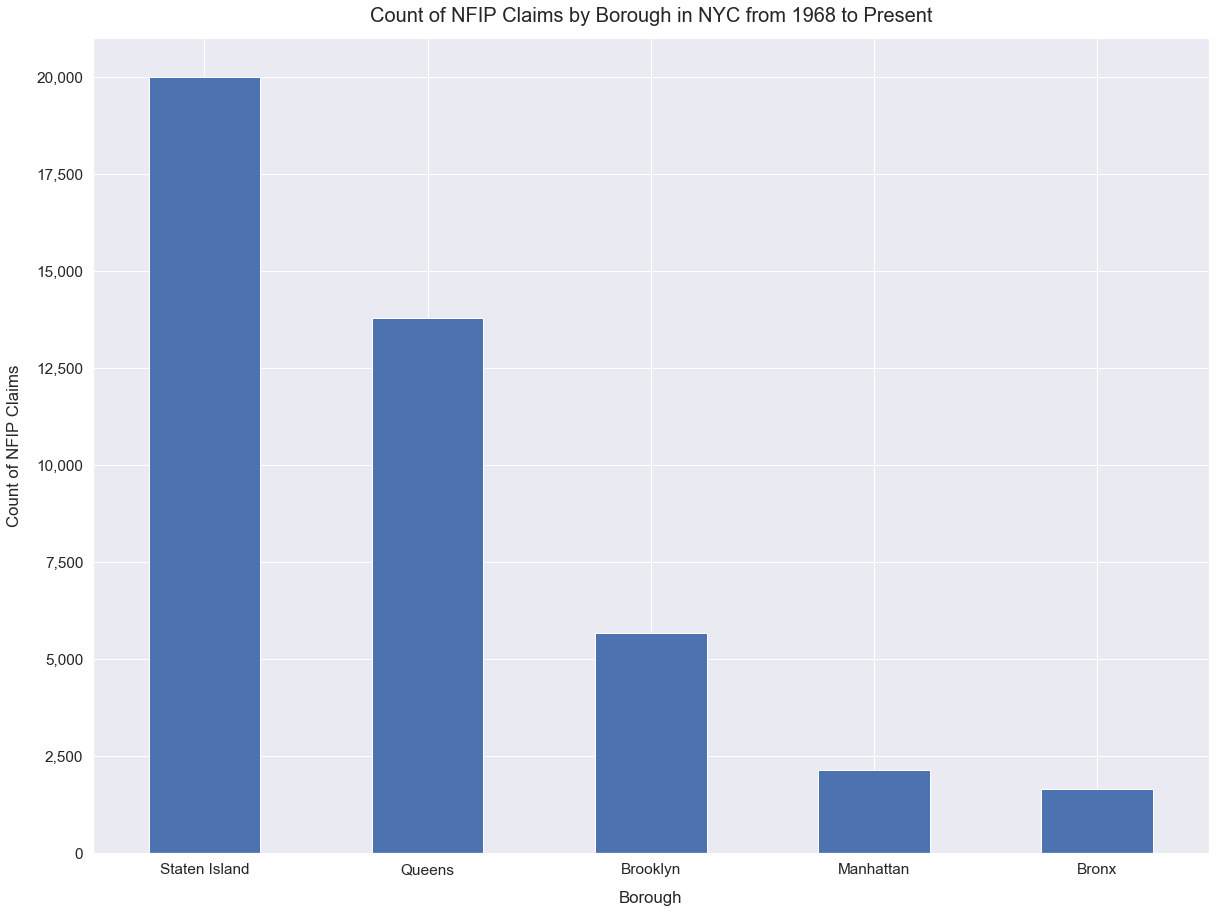

In [121]:
# defining our plot
sns.set(font_scale=1.4)
plt.subplots(figsize=(20,15))
ax = plt.subplot()

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plotting bar chart of number of claims by borough
nyc_claims_byborough.sort_values('claimscount', ascending=False).plot.bar(x='Borough', y='claimscount', ax=ax, rot=0, color='b', legend=False)
plt.xlabel("Borough", labelpad=14)
plt.ylabel("Count of NFIP Claims", labelpad=14)
plt.title("Count of NFIP Claims by Borough in NYC from 1968 to Present", pad=16, fontsize=20);

# saving figure
plt.savefig('Figures/nyc_claims_byborough_count.png')

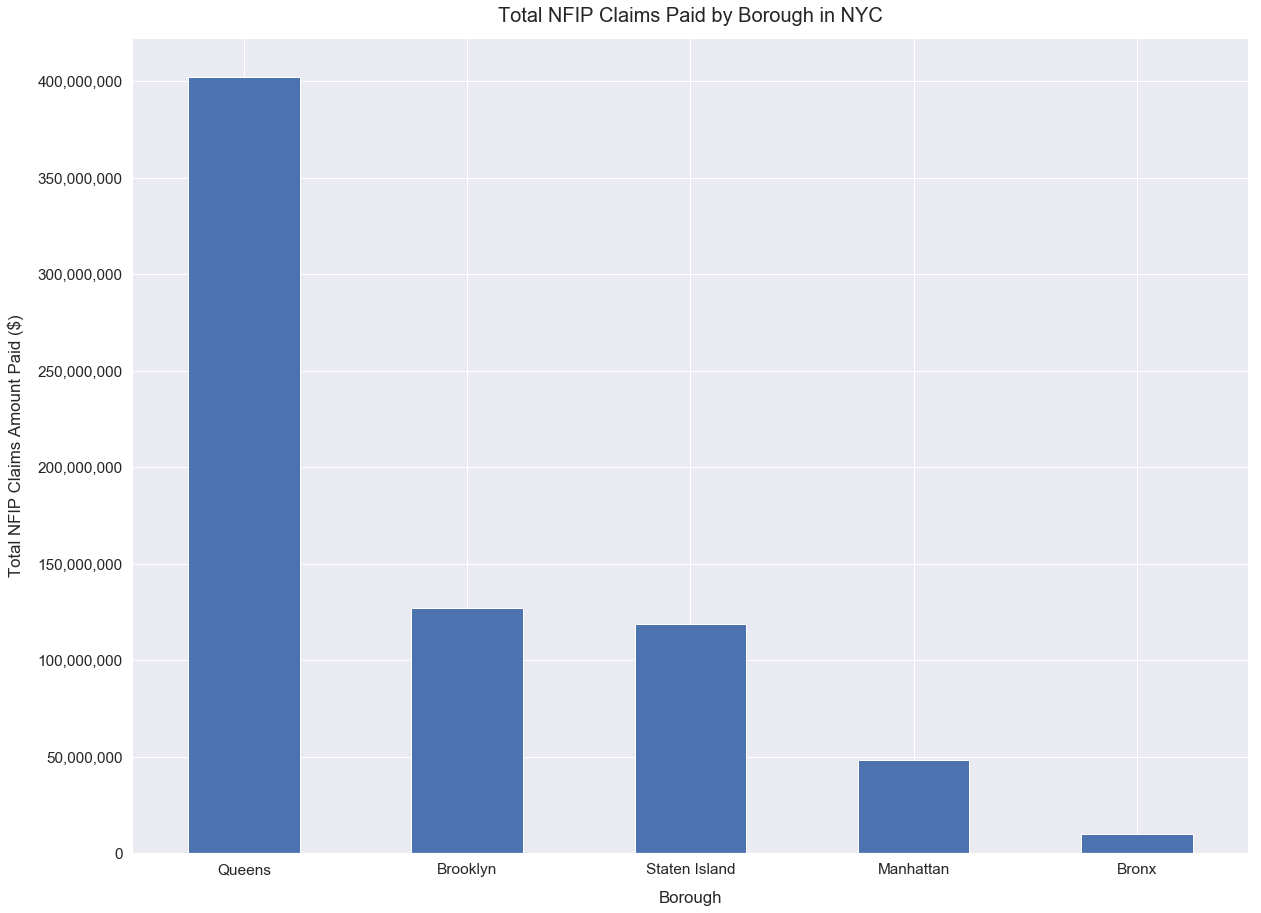

In [123]:
# defining our plot
sns.set(font_scale=1.4)
plt.subplots(figsize=(20,15))
ax = plt.subplot()

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plotting bar chart of claim amount by borough
nyc_claims_byborough.sort_values('amountpaidon_totalclaim', ascending=False).plot.bar(x='Borough', y='amountpaidon_totalclaim', ax=ax, rot=0, color='b', legend=False)
plt.xlabel("Borough", labelpad=14)
plt.ylabel("Total NFIP Claims Amount Paid ($)", labelpad=14)
plt.title("Total NFIP Claims Paid by Borough in NYC", pad=16, fontsize=20)

# saving figure
plt.savefig('Figures/nyc_claims_byborough_amount.png')

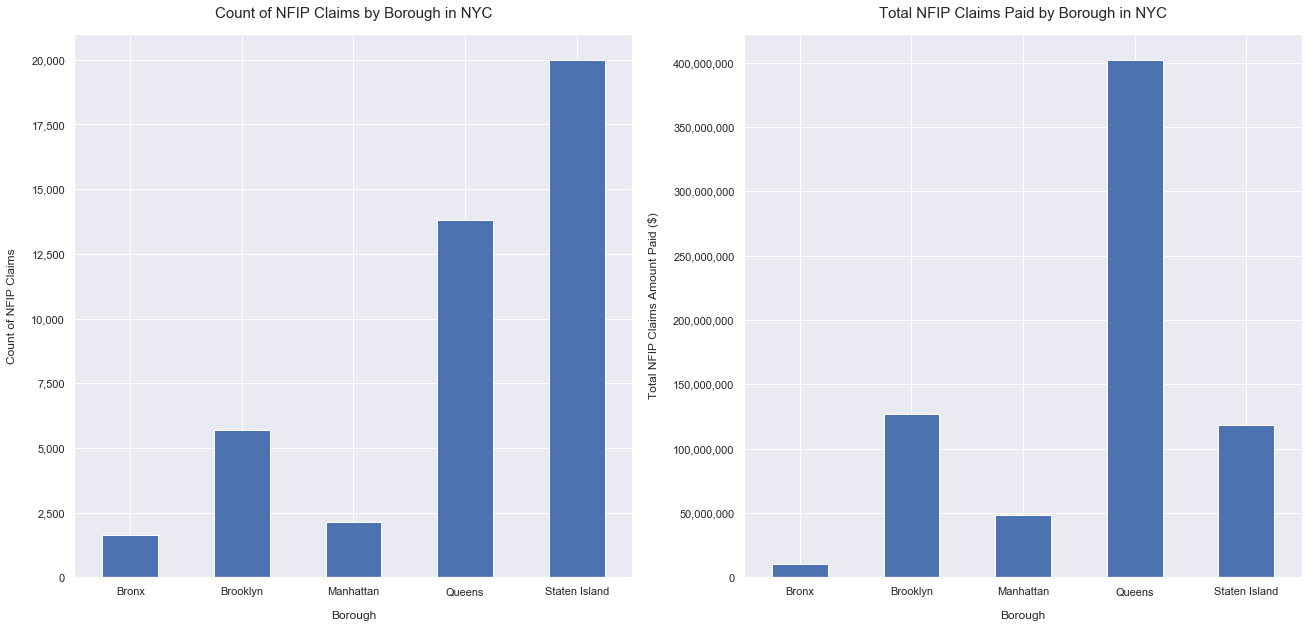

In [75]:
# defining our plot
sns.set(font_scale=1)
fig = pl.figure(figsize=(22,10))

# adding first subplot
ax = fig.add_subplot(121)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plotting bar chart of number of claims by borough
nyc_claims_byborough.plot.bar(x='Borough', y='claimscount', ax=ax, rot=0, color='b', legend=False)
plt.xlabel("Borough", labelpad=14)
plt.ylabel("Count of NFIP Claims", labelpad=14)
plt.title("Count of NFIP Claims by Borough in NYC", pad=16, fontsize=15)

# adding second subplot
ax = fig.add_subplot(122)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plotting bar chart of claims amount by borough
nyc_claims_byborough.plot.bar(x='Borough', y='amountpaidon_totalclaim', ax=ax, rot=0, color='b', legend=False)
plt.xlabel("Borough", labelpad=14)
plt.ylabel("Total NFIP Claims Amount Paid ($)", labelpad=14)
plt.title("Total NFIP Claims Paid by Borough in NYC", pad=16, fontsize=15)

# saving figure
plt.savefig('Figures/nyc_claims_byborough_subplots.png')

In [76]:
# writing out a csv file of dataframe
nyc_claims_byborough.to_csv('OutputFiles/nyc_claims_byborough20190731.csv')

In [77]:
# checking our dataframe
nyc_claims_byborough_test = pd.read_csv('OutputFiles/nyc_claims_byborough20190731.csv')

In [78]:
# previewing dataframe
nyc_claims_byborough_test

,Unnamed: 0,Borough,claimscount,amountpaidon_totalclaim
0,0,Bronx,1652,10200472.11
1,1,Brooklyn,5676,126890953.82
2,2,Manhattan,2150,48361200.32
3,3,Queens,13796,402311375.11
4,4,Staten Island,20006,118567186.51


In [79]:
# identifying working directory
%pwd

'/Users/geribauer/fema-nfip-claims/nfip-claims-nyc'

In [80]:
# listing our figures in our Figures folder
%cd ~/fema-nfip-claims/nfip-claims-nyc/Figures/
%ls

/Users/geribauer/fema-nfip-claims/nfip-claims-nyc/Figures
nyc_claims_byborough_amount.png    nyc_claims_byborough_subplots.png


In [81]:
# listing our output files in our OutputFiles folder
%cd ~/fema-nfip-claims/nfip-claims-nyc/OutputFiles/
%ls

/Users/geribauer/fema-nfip-claims/nfip-claims-nyc/OutputFiles
nfip_claims_nyc20190731.csv       nyc_claims_byborough20190731.csv


In [82]:
# changind directory back to our project folder 
%cd ~/fema-nfip-claims/nfip-claims-nyc

/Users/geribauer/fema-nfip-claims/nfip-claims-nyc


## 8.1 Calculating the number and amount of NFIP claims by date of loss

In [83]:
# previewing first five rows of dataframe
nfip_claims_nyc.head()

,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence,Borough,amountpaidon_totalclaim
0,NaN,2019-07-31,nan,1.00,BRONX,N,1.00,36005.00,0.00,2011-08-27,...,7,NaN,NY,250000.00,100000.00,2011,10471.00,Y,Bronx,0.00
1,NaN,2019-07-31,nan,1.00,BRONX,N,1.00,36005.00,0.00,2012-05-24,...,7,NaN,NY,250000.00,100000.00,2012,10471.00,Y,Bronx,0.00
2,NaN,2019-07-31,nan,0.00,BROOKLYN,N,1.00,36047.00,0.00,2012-10-29,...,7,NaN,NY,250000.00,100000.00,2012,11234.00,Y,Brooklyn,60829.72
3,NaN,2019-07-31,nan,2.00,STATEN ISLAND,N,1.00,36085.00,0.00,2011-10-29,...,7,NaN,NY,250000.00,100000.00,2011,10314.00,Y,Staten Island,2212.13
4,NaN,2019-07-31,nan,1.00,BROOKLYN,N,1.00,36047.00,0.00,2012-10-29,...,7,NaN,NY,250000.00,100000.00,2012,11235.00,Y,Brooklyn,73687.72


In [84]:
# viewing shape (i.e. rows, columns) of dataframe
nfip_claims_nyc.shape

(43280, 41)

In [85]:
# summing total claim amount of our dataframe
nfip_claims_nyc.amountpaidon_totalclaim.sum()

706331187.87

In [86]:
# viewing column datatypes in our dataframe
nfip_claims_nyc.dtypes

agriculturestructureindicator                  object
asofdate                                       object
basefloodelevation                            float64
basementenclosurecrawlspacetype               float64
reportedcity                                   object
condominiumindicator                           object
policycount                                   float64
countycode                                    float64
crsdiscount                                   float64
dateofloss                                     object
elevatedbuildingindicator                      object
elevationcertificateindicator                  object
elevationdifference                           float64
censustract                                   float64
floodzone                                      object
houseworship                                   object
latitude                                      float64
locationofcontents                             object
longitude                   

In [87]:
# previewing our 'dateofloss' column
nfip_claims_nyc.dateofloss.head()

0    2011-08-27
1    2012-05-24
2    2012-10-29
3    2011-10-29
4    2012-10-29
Name: dateofloss, dtype: object

In [88]:
# viewing the datatype of 'dateofloss' column
nfip_claims_nyc.dateofloss.dtype

dtype('O')

In [89]:
# setting index to 'dateofloss' column
nfip_claims_nyc.set_index('dateofloss', drop=False, inplace=True)

In [90]:
# previewing dataframe
nfip_claims_nyc.head()

,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence,Borough,amountpaidon_totalclaim
dateofloss,,,,,,,,,,,,,,,,,,,,,
2011-08-27,NaN,2019-07-31,nan,1.00,BRONX,N,1.00,36005.00,0.00,2011-08-27,...,7,NaN,NY,250000.00,100000.00,2011,10471.00,Y,Bronx,0.00
2012-05-24,NaN,2019-07-31,nan,1.00,BRONX,N,1.00,36005.00,0.00,2012-05-24,...,7,NaN,NY,250000.00,100000.00,2012,10471.00,Y,Bronx,0.00
2012-10-29,NaN,2019-07-31,nan,0.00,BROOKLYN,N,1.00,36047.00,0.00,2012-10-29,...,7,NaN,NY,250000.00,100000.00,2012,11234.00,Y,Brooklyn,60829.72
2011-10-29,NaN,2019-07-31,nan,2.00,STATEN ISLAND,N,1.00,36085.00,0.00,2011-10-29,...,7,NaN,NY,250000.00,100000.00,2011,10314.00,Y,Staten Island,2212.13
2012-10-29,NaN,2019-07-31,nan,1.00,BROOKLYN,N,1.00,36047.00,0.00,2012-10-29,...,7,NaN,NY,250000.00,100000.00,2012,11235.00,Y,Brooklyn,73687.72


In [91]:
# adding a column called 'claimamount' as 1 to dataframe
nfip_claims_nyc.insert(0, "claimcount", 1)

In [92]:
# grouping dataframe by 'dateofloss' and summing each value
nfip_claims_nyc_byyear = nfip_claims_nyc.groupby('dateofloss').sum()

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'dateofloss' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


In [93]:
# Add comment here
nfip_claims_nyc_byyear.tail()

,claimcount,basefloodelevation,basementenclosurecrawlspacetype,policycount,countycode,crsdiscount,elevationdifference,censustract,latitude,longitude,...,numberoffloorsintheinsuredbuilding,obstructiontype,occupancytype,amountpaidonbuildingclaim,amountpaidoncontentsclaim,amountpaidonincreasedcostofcomplianceclaim,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,amountpaidon_totalclaim
dateofloss,,,,,,,,,,,,,,,,,,,,,
2019-05-18,1,0.00,2.00,1.00,36081.00,0.00,999.00,36081088400.00,40.66,-73.84,...,3.00,0.00,1.00,0.00,0.00,0.00,185500.00,0.00,2019,0.00
2019-06-09,1,0.00,0.00,1.00,36061.00,0.25,999.00,36061004300.00,40.72,-74.00,...,1.00,10.00,1.00,0.00,0.00,0.00,50000.00,11900.00,2019,0.00
2019-07-17,2,14.00,2.00,2.00,72086.00,0.00,997.00,72086106700.00,81.60,-147.66,...,4.00,0.00,7.00,0.00,0.00,0.00,575000.00,530000.00,4038,0.00
2019-07-18,1,0.00,1.00,1.00,36005.00,0.00,999.00,36005016000.00,40.83,-73.81,...,3.00,0.00,2.00,0.00,0.00,0.00,250000.00,0.00,2019,0.00
2019-07-22,6,0.00,8.00,6.00,216354.00,0.00,4991.00,216354197500.00,244.07,-444.12,...,17.00,50.00,8.00,0.00,0.00,0.00,970000.00,387800.00,12114,0.00


In [94]:
# identifying datatype of our index
nfip_claims_nyc_byyear.index.dtype

dtype('O')

In [95]:
# transforming our index ('dateofloss') to datetime
nfip_claims_nyc_byyear.index = pd.to_datetime(nfip_claims_nyc_byyear.index, infer_datetime_format=True)

In [96]:
# identifying new datatype of our index
nfip_claims_nyc_byyear.index.dtype

dtype('<M8[ns]')

In [97]:
# identifying column datatypes of dataframe
nfip_claims_nyc_byyear.dtypes

claimcount                                      int64
basefloodelevation                            float64
basementenclosurecrawlspacetype               float64
policycount                                   float64
countycode                                    float64
crsdiscount                                   float64
elevationdifference                           float64
censustract                                   float64
latitude                                      float64
longitude                                     float64
lowestadjacentgrade                           float64
lowestfloorelevation                          float64
numberoffloorsintheinsuredbuilding            float64
obstructiontype                               float64
occupancytype                                 float64
amountpaidonbuildingclaim                     float64
amountpaidoncontentsclaim                     float64
amountpaidonincreasedcostofcomplianceclaim    float64
totalbuildinginsurancecovera

In [98]:
# previewing first five rows of dataframe
nfip_claims_nyc_byyear.head()

,claimcount,basefloodelevation,basementenclosurecrawlspacetype,policycount,countycode,crsdiscount,elevationdifference,censustract,latitude,longitude,...,numberoffloorsintheinsuredbuilding,obstructiontype,occupancytype,amountpaidonbuildingclaim,amountpaidoncontentsclaim,amountpaidonincreasedcostofcomplianceclaim,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,amountpaidon_totalclaim
dateofloss,,,,,,,,,,,,,,,,,,,,,
1976-08-09,1,0.00,2.00,1.00,36085.00,0.00,999.00,36085006400.00,40.60,-74.07,...,3.00,0.00,1.00,0.00,0.00,0.00,10000.00,0.00,1976,0.00
1976-11-08,1,0.00,4.00,1.00,36085.00,0.00,999.00,36085018100.00,40.58,-74.12,...,3.00,0.00,1.00,140.00,985.00,0.00,5000.00,3000.00,1976,1125.00
1977-01-08,5,0.00,20.00,5.00,180425.00,0.00,4995.00,180425104923.00,202.94,-370.72,...,13.00,0.00,7.00,5757.00,4723.00,0.00,39900.00,21000.00,9885,10480.00
1977-01-10,1,0.00,4.00,1.00,36085.00,0.00,999.00,36085011201.00,40.58,-74.08,...,1.00,0.00,1.00,800.00,0.00,0.00,35000.00,0.00,1977,0.00
1977-02-24,2,0.00,2.00,2.00,72170.00,0.00,1998.00,72170026404.00,81.11,-148.26,...,6.00,0.00,3.00,100.00,1125.00,0.00,15300.00,4200.00,3954,1225.00


In [99]:
# adding a new column called 'Year' based on our 'dateofloss' index
nfip_claims_nyc_byyear['Year'] = nfip_claims_nyc_byyear.index.year

In [100]:
# previewing first five rows of dataframe
nfip_claims_nyc_byyear.head()

,claimcount,basefloodelevation,basementenclosurecrawlspacetype,policycount,countycode,crsdiscount,elevationdifference,censustract,latitude,longitude,...,obstructiontype,occupancytype,amountpaidonbuildingclaim,amountpaidoncontentsclaim,amountpaidonincreasedcostofcomplianceclaim,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,amountpaidon_totalclaim,Year
dateofloss,,,,,,,,,,,,,,,,,,,,,
1976-08-09,1,0.00,2.00,1.00,36085.00,0.00,999.00,36085006400.00,40.60,-74.07,...,0.00,1.00,0.00,0.00,0.00,10000.00,0.00,1976,0.00,1976
1976-11-08,1,0.00,4.00,1.00,36085.00,0.00,999.00,36085018100.00,40.58,-74.12,...,0.00,1.00,140.00,985.00,0.00,5000.00,3000.00,1976,1125.00,1976
1977-01-08,5,0.00,20.00,5.00,180425.00,0.00,4995.00,180425104923.00,202.94,-370.72,...,0.00,7.00,5757.00,4723.00,0.00,39900.00,21000.00,9885,10480.00,1977
1977-01-10,1,0.00,4.00,1.00,36085.00,0.00,999.00,36085011201.00,40.58,-74.08,...,0.00,1.00,800.00,0.00,0.00,35000.00,0.00,1977,0.00,1977
1977-02-24,2,0.00,2.00,2.00,72170.00,0.00,1998.00,72170026404.00,81.11,-148.26,...,0.00,3.00,100.00,1125.00,0.00,15300.00,4200.00,3954,1225.00,1977


In [101]:
# selecting only important columns
nfip_claims_nyc_byyear = nfip_claims_nyc_byyear[['claimcount', 'amountpaidon_totalclaim', 'Year']]

In [102]:
# previewing first five rows of dataframe
nfip_claims_nyc_byyear.head()

,claimcount,amountpaidon_totalclaim,Year
dateofloss,,,
1976-08-09,1,0.00,1976
1976-11-08,1,1125.00,1976
1977-01-08,5,10480.00,1977
1977-01-10,1,0.00,1977
1977-02-24,2,1225.00,1977


In [103]:
# grouping dataframe by 'Year' and summing values of columns
nfip_claims_nyc_byyear = nfip_claims_nyc_byyear.groupby('Year').sum()

In [104]:
# previewing first five rows of dataframe
nfip_claims_nyc_byyear.head()

,claimcount,amountpaidon_totalclaim
Year,,
1976,2,1125.00
1977,1121,1605535.93
1978,2502,5649868.80
1979,4723,11022079.67
1980,4176,6512945.86


In [105]:
# transforming our 'Year' index to datetime
nfip_claims_nyc_byyear.index = pd.to_datetime(nfip_claims_nyc_byyear.index, format='%Y')

In [106]:
# identifying datatype of our index
nfip_claims_nyc_byyear.index.dtype

dtype('<M8[ns]')

In [107]:
# previewing first five rows of dataframe
nfip_claims_nyc_byyear.head()

,claimcount,amountpaidon_totalclaim
Year,,
1976-01-01,2,1125.00
1977-01-01,1121,1605535.93
1978-01-01,2502,5649868.80
1979-01-01,4723,11022079.67
1980-01-01,4176,6512945.86


In [108]:
# summing number of claims of dataframe
nfip_claims_nyc_byyear.claimcount.sum()

43280

In [109]:
# summing total claim amount of dataframe
nfip_claims_nyc_byyear.amountpaidon_totalclaim.sum()

706331187.8700017

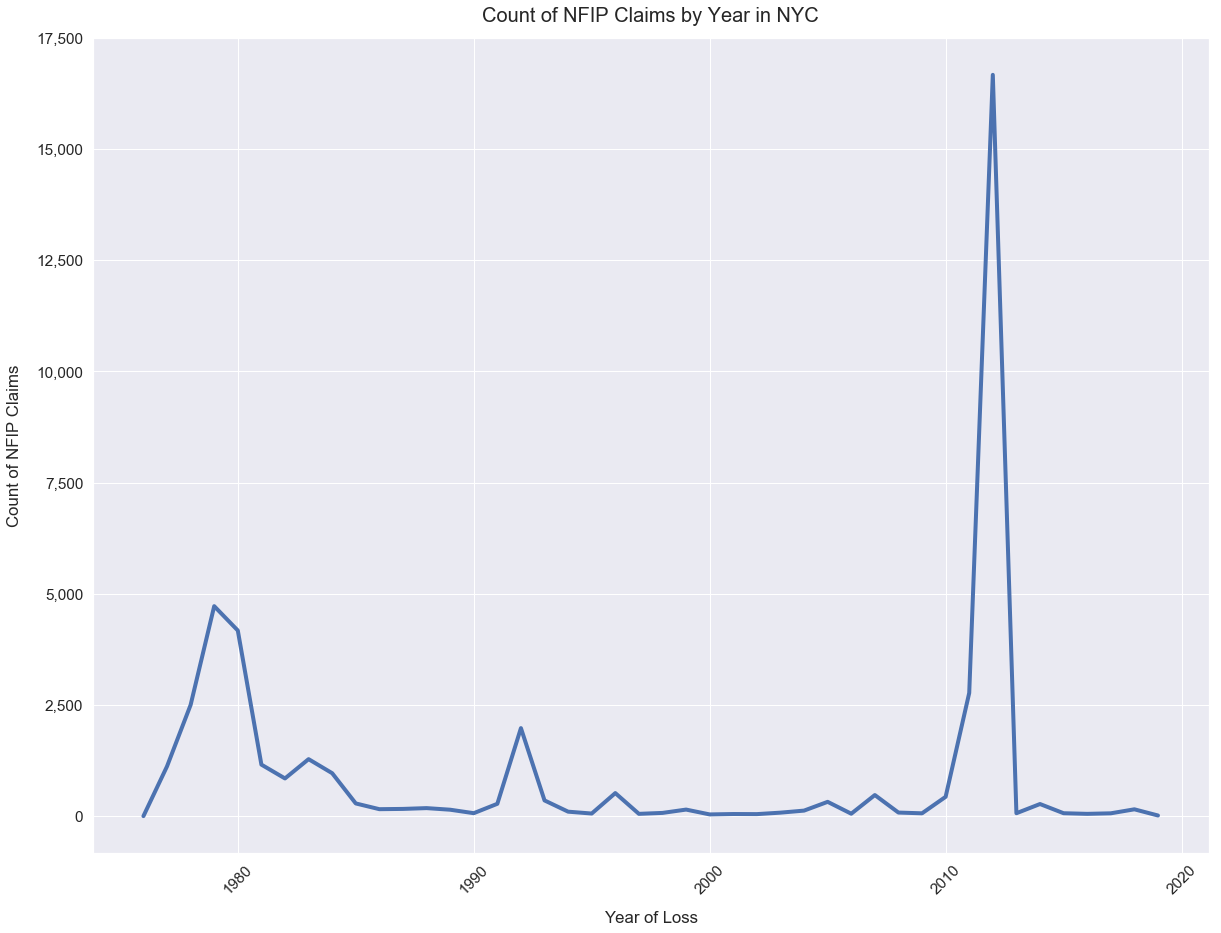

In [122]:
# defining our plot
sns.set(font_scale=1.4)
plt.subplots(figsize=(20,15))
ax = plt.subplot()

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plotting bar chart of number of claims by year
nfip_claims_nyc_byyear['claimcount'].plot(ax=ax, color='b', legend=False, rot=45, linewidth=4)
plt.xlabel("Year of Loss", labelpad=14)
plt.ylabel("Count of NFIP Claims", labelpad=14)
plt.title("Count of NFIP Claims by Year in NYC", pad=16, fontsize=20)

# saving figure
plt.savefig('Figures/nfip_claims_nyc_byyear_count.png')

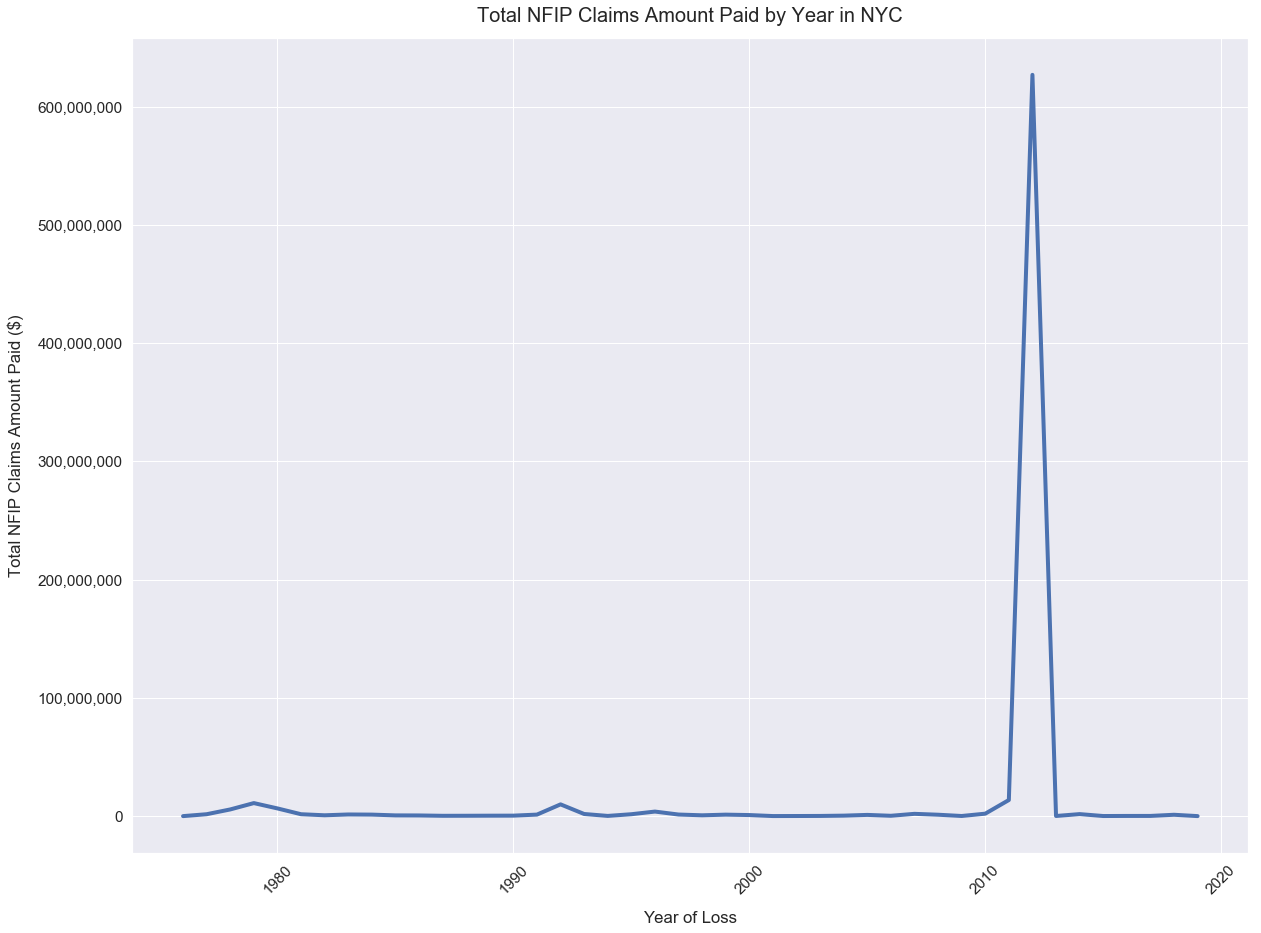

In [119]:
# Add comment here
sns.set(font_scale=1.4)
plt.subplots(figsize=(20,15))
ax = plt.subplot()

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plotting bar chart of total claim amount by year
nfip_claims_nyc_byyear['amountpaidon_totalclaim'].plot(ax=ax, color='b', legend=False, rot=45, linewidth=4)
plt.xlabel("Year of Loss", labelpad=14)
plt.ylabel("Total NFIP Claims Amount Paid ($)", labelpad=14)
plt.title("Total NFIP Claims Amount Paid by Year in NYC", pad=16, fontsize=20)

# saving figure
plt.savefig('Figures/nfip_claims_nyc_byyear_amount.png')

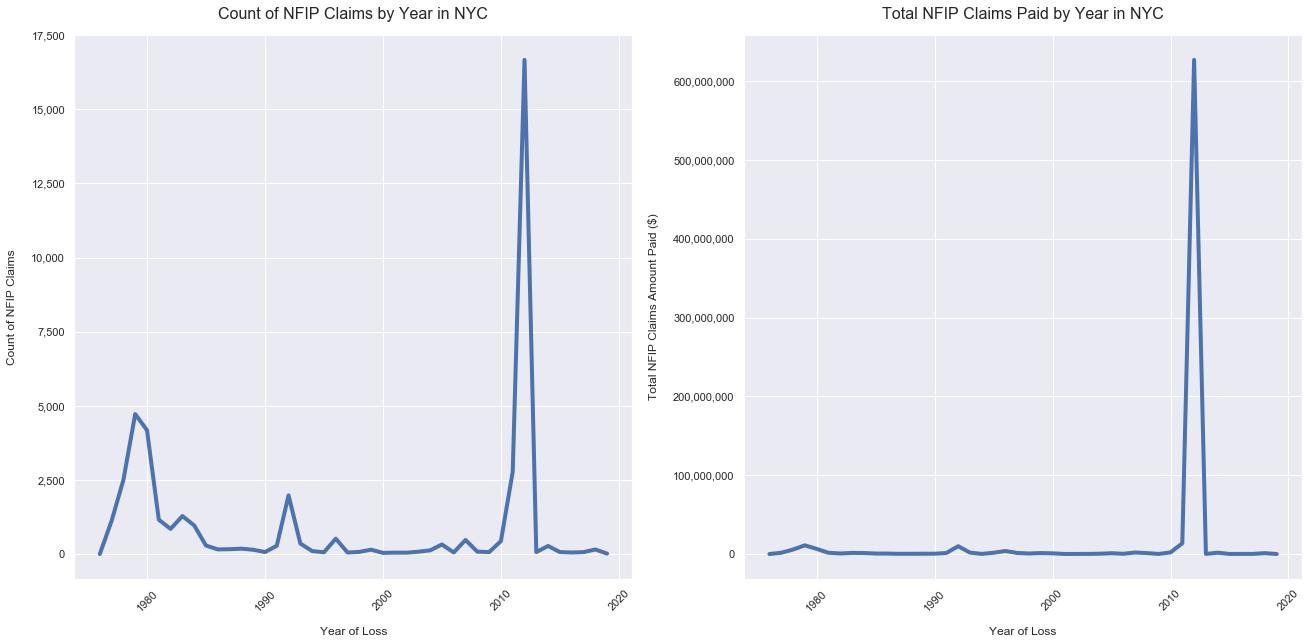

In [118]:
# defining our plot
sns.set(font_scale=1)
fig = pl.figure(figsize=(22,10))

# adding first subplot
ax = fig.add_subplot(121)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plotting bar chart of number of claims by year
nfip_claims_nyc_byyear['claimcount'].plot(ax=ax, color='b', legend=False, rot=45, linewidth=4)
plt.xlabel("Year of Loss", labelpad=14)
plt.ylabel("Count of NFIP Claims", labelpad=14)
plt.title("Count of NFIP Claims by Year in NYC", pad=16, fontsize=16)

# adding second subplot
ax = fig.add_subplot(122)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plotting bar chart of total claim amount by year
nfip_claims_nyc_byyear['amountpaidon_totalclaim'].plot(ax=ax, color='b', legend=False, rot=45, linewidth=4)
plt.xlabel("Year of Loss", labelpad=14)
plt.ylabel("Total NFIP Claims Amount Paid ($)", labelpad=14)
plt.title("Total NFIP Claims Paid by Year in NYC", pad=16, fontsize=16)

# saving figure
plt.savefig('Figures/nfip_claims_nyc_byyear_subplots.png')

In [124]:
# writing out and saving dataframe as 'nfip_claims_nyc_byyear.csv'
nfip_claims_nyc_byyear.to_csv('OutputFiles/nfip_claims_nyc_byyear.csv')

In [125]:
# checking to see if our file is saved
%cd OutputFiles/
%ls

/Users/geribauer/fema-nfip-claims/nfip-claims-nyc/OutputFiles
nfip_claims_nyc20190731.csv       nyc_claims_byborough20190731.csv
nfip_claims_nyc_byyear.csv
